# Cauchy's argument principle

\begin{equation}
\frac{1}{2\pi i}\oint_C \frac{f^\prime(z)}{f(z)}\mathrm{d}z = Z - P
\end{equation}

First try a function with a pole of order 1:
\begin{equation}
f(z) = \frac{1}{z}
\end{equation}

Z - P = (-1+1.250873303884181e-17j)


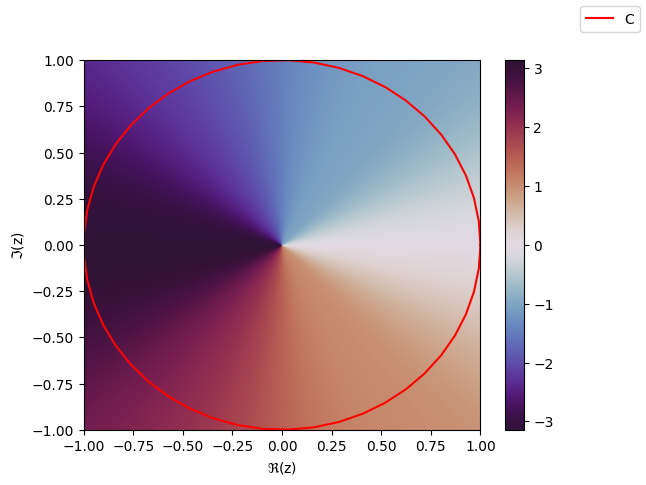

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from poles_roots.plotting import phase_plot, plot_triangulation_with_argument_principle
from poles_roots.integration import argument_principle_from_parametrisation

def f(z):
    return 1/z

def f_jac(z):
    return -1/z**2

def param(t):
    return np.exp(t*1j)

def param_jac(t):
    return 1j*np.exp(t*1j)

limits = (0, 2*np.pi)

print(f"Z - P = {argument_principle_from_parametrisation(f, f_jac, param, param_jac, limits)}")

fig, ax = plt.subplots()
im = phase_plot(f, ax)
fig.colorbar(im)
z = param(np.linspace(*limits))
ax.plot(np.real(z), np.imag(z), "r-", label="C")
fig.legend()


Now function with a pole of order 2:
\begin{equation}
f(z) = \frac{1}{z^2}
\end{equation}

Z - P = (-2+1.6557466835709262e-17j)


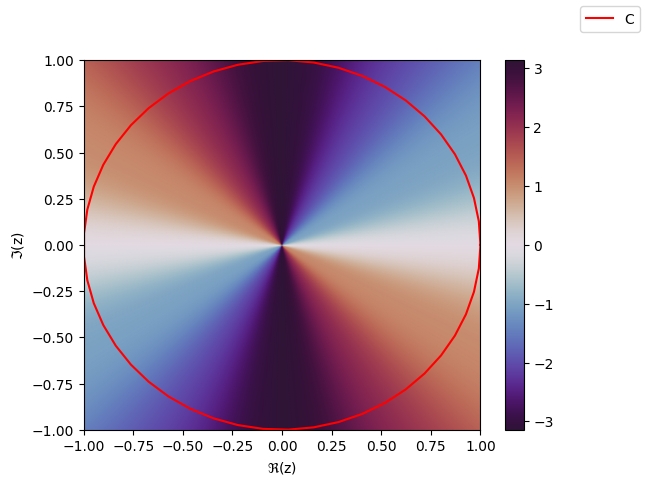

In [3]:
def f(z):
    return 1/z**2

def f_jac(z):
    return -2/z**3

print(f"Z - P = {argument_principle_from_parametrisation(f, f_jac, param, param_jac, limits)}")

fig, ax = plt.subplots()
im = phase_plot(f, ax)
fig.colorbar(im)
z = param(np.linspace(*limits))
ax.plot(np.real(z), np.imag(z), "r-", label="C")
fig.legend()


Now a function with a zero of order 1:
\begin{equation}
f(z) = z
\end{equation}

Z - P = (1-3.908210054460056e-18j)


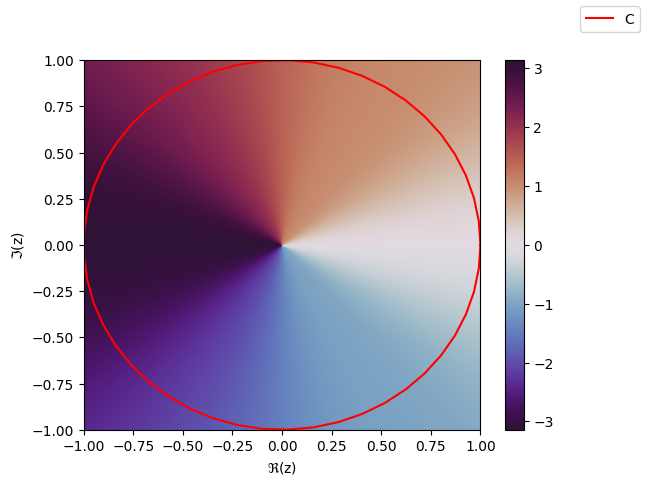

In [4]:
def f(z):
    return z

def f_jac(z):
    return 1

print(f"Z - P = {argument_principle_from_parametrisation(f, f_jac, param, param_jac, limits)}")

fig, ax = plt.subplots()
im = phase_plot(f, ax)
fig.colorbar(im)
z = param(np.linspace(*limits))
ax.plot(np.real(z), np.imag(z), "r-", label="C")
fig.legend()


Now a function with one pole and one zero, both of order one:
\begin{equation}
f(z) = \frac{z}{z-0.5}
\end{equation}

Z - P = (-2.7755575615628914e-16+4.721803346402085e-17j)


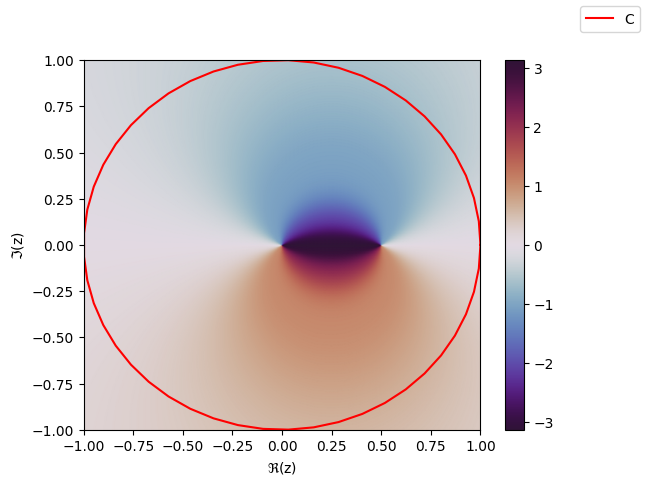

In [5]:
def f(z):
    return z/(z-0.5)

def f_jac(z):
    return -0.5/(z*0.5)**2

print(f"Z - P = {argument_principle_from_parametrisation(f, f_jac, param, param_jac, limits)}")

fig, ax = plt.subplots()
im = phase_plot(f, ax)
fig.colorbar(im)
z = param(np.linspace(*limits))
ax.plot(np.real(z), np.imag(z), "r-", label="C")
fig.legend()


Trying a function with an essential singularity

\begin{equation}
f(z)=\sin(1/z)
\end{equation}

Z - P = (-0.9999999999999983+1.6760553613453344e-17j)


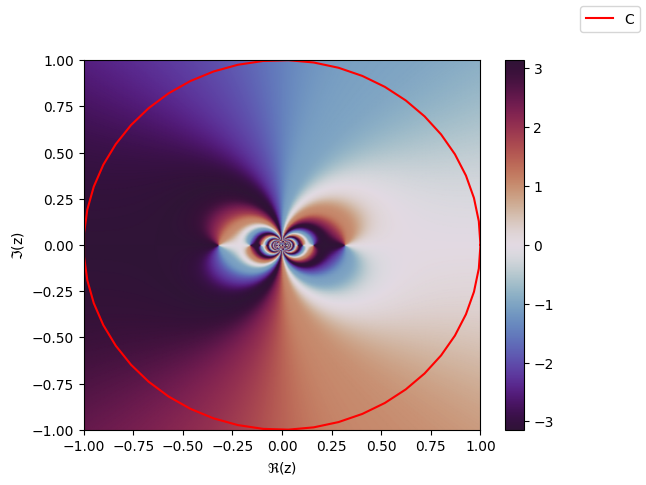

In [6]:
def f(z):
    return np.sin(1/z)

def f_jac(z):
    return -np.cos(1/z)/z**2

print(f"Z - P = {argument_principle_from_parametrisation(f, f_jac, param, param_jac, limits)}")

fig, ax = plt.subplots()
im = phase_plot(f, ax)
fig.colorbar(im)
z = param(np.linspace(*limits))
ax.plot(np.real(z), np.imag(z), "r-", label="C")
fig.legend()


We can also apply the argument principle to a triangulation:

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\Re$(z)', ylabel='$\\Im$(z)'>)

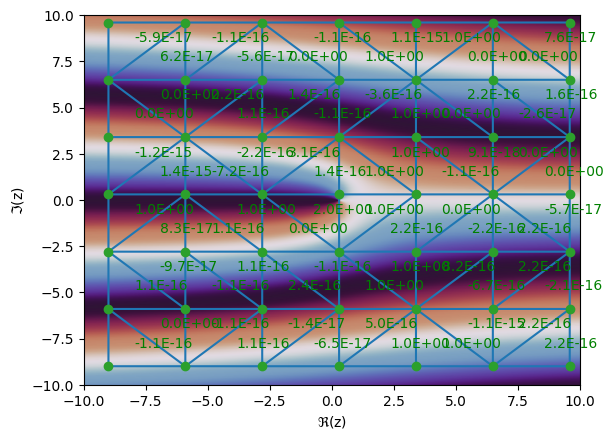

In [5]:
from poles_roots.integration import argument_priciple_of_triangulation
from poles_roots.reference_problems import func2, func2_jac

tmp = np.linspace(-9, 9.6, num=7)
points = np.array(np.meshgrid(tmp, tmp)).T.reshape(-1, 2)

tri = scipy.spatial.Delaunay(points)

z_minus_p = argument_priciple_of_triangulation(func2, func2_jac, points, tri.simplices)

plot_triangulation_with_argument_principle(f, tri.points, tri.simplices, z_minus_p)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\Re$(z)', ylabel='$\\Im$(z)'>)

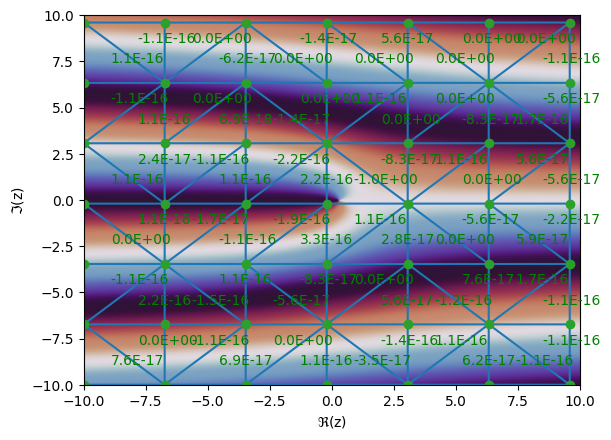

In [4]:
import scipy.special

def f(z):
    return np.exp(z)/(z-0.3)

def f_prime(z):
    return np.exp(z)*(z-1.3)/(z-0.3)**2

tmp = np.linspace(-10, 9.6, num=7)
points = np.array(np.meshgrid(tmp, tmp)).T.reshape(-1, 2)

tri = scipy.spatial.Delaunay(points)

z_minus_p = argument_priciple_of_triangulation(f, f_prime, points, tri.simplices)

plot_triangulation_with_argument_principle(f, tri.points, tri.simplices, z_minus_p)